In [ ]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/ecommerce_customer_churn_dataset.csv", encoding="latin1")


In [ ]:


# Show first rows
print(df.head())

# Dataset shape
print("Dataset Shape:", df.shape)

# Column info
print(df.info())

    Age  Gender Country        City  Membership_Years  Login_Frequency  \
0  43.0    Male  France   Marseille               2.9             14.0   
1  36.0    Male      UK  Manchester               1.6             15.0   
2  45.0  Female  Canada   Vancouver               2.9             10.0   
3  56.0  Female     USA    New York               2.6             10.0   
4  35.0    Male   India       Delhi               3.1             29.0   

   Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0                  27.4                6.0                   50.6   
1                  42.7               10.3                   37.7   
2                  24.8                1.6                   70.9   
3                  38.4               14.8                   41.7   
4                  51.4                NaN                   19.1   

   Wishlist_Items  ...  Email_Open_Rate  Customer_Service_Calls  \
0             3.0  ...             17.9                     9.0   
1     

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64


In [ ]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill numeric missing values with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical missing values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled successfully!")


Missing values handled successfully!


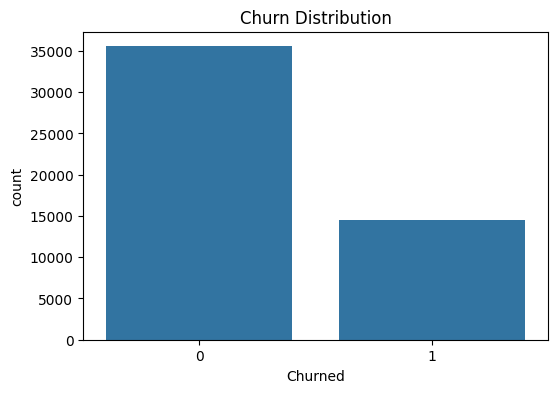

Churned
0    0.711
1    0.289
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churned", data=df)
plt.title("Churn Distribution")
plt.show()

print(df["Churned"].value_counts(normalize=True))


In [ ]:
print(df.describe())


                Age  Membership_Years  Login_Frequency  Session_Duration_Avg  \
count  50000.000000      50000.000000     50000.000000          50000.000000   
mean      37.802968          2.984009        11.624660             27.660754   
std       11.535608          2.059105         7.810657             10.494997   
min        5.000000          0.100000         0.000000              1.000000   
25%       30.000000          1.400000         6.000000             20.200000   
50%       37.802968          2.500000        11.000000             27.660754   
75%       45.000000          4.000000        17.000000             34.000000   
max      200.000000         10.000000        46.000000             75.600000   

       Pages_Per_Session  Cart_Abandonment_Rate  Wishlist_Items  \
count       50000.000000           50000.000000    50000.000000   
mean            8.737811              57.079973        4.298391   
std             3.663118              16.282723        3.059502   
min        

In [ ]:
categorical_cols = ["Gender", "Country", "City", "Signup_Quarter"]

for col in categorical_cols:
    print("\n", col)
    print(df[col].value_counts())



 Gender
Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64

 Country
Country
USA          17384
UK            7534
Canada        6023
Germany       4925
Australia     4061
France        4013
India         3512
Japan         2548
Name: count, dtype: int64

 City
City
Houston        3549
Phoenix        3490
New York       3477
Chicago        3475
Los Angeles    3393
Manchester     1576
Birmingham     1535
Leeds          1529
London         1458
Glasgow        1436
Montreal       1247
Toronto        1209
Calgary        1204
Ottawa         1182
Vancouver      1181
Cologne        1033
Hamburg        1026
Berlin         1013
Munich          960
Frankfurt       893
Lyon            830
Sydney          828
Perth           817
Adelaide        817
Toulouse        815
Melbourne       805
Nice            799
Brisbane        794
Marseille       793
Paris           776
Chennai         736
Bangalore       698
Mumbai          694
Delhi           693
Hyderabad       691
To

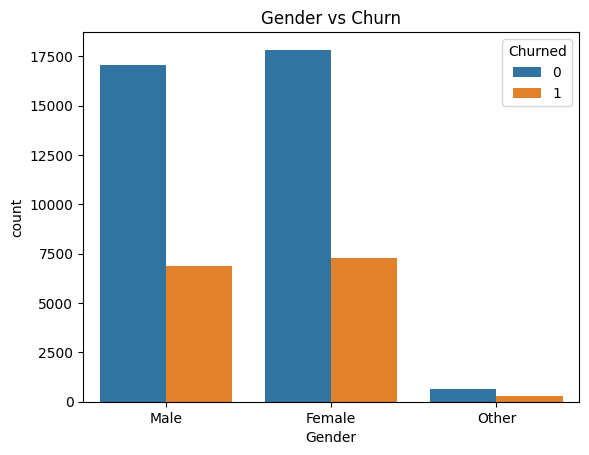

In [ ]:
sns.countplot(x="Gender", hue="Churned", data=df)
plt.title("Gender vs Churn")
plt.show()


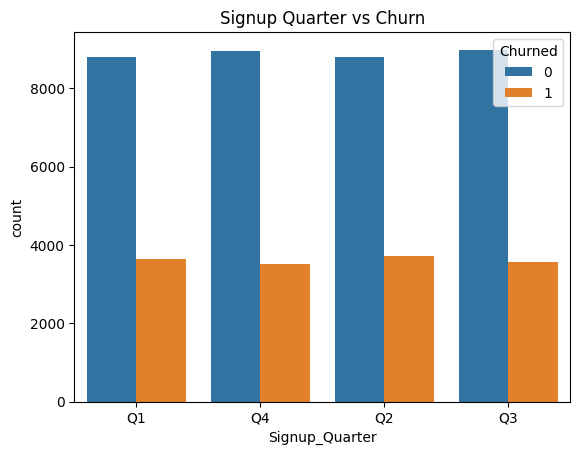

In [ ]:
sns.countplot(x="Signup_Quarter", hue="Churned", data=df)
plt.title("Signup Quarter vs Churn")
plt.show()


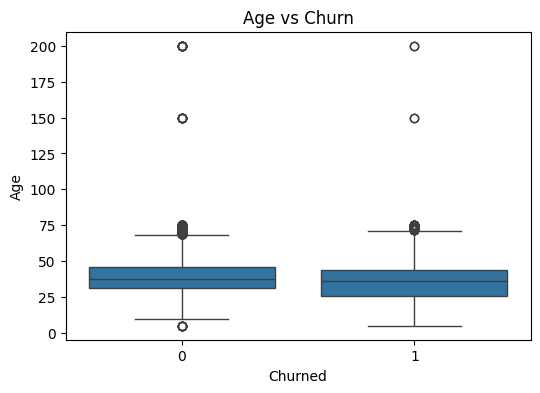

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churned", y="Age", data=df)
plt.title("Age vs Churn")
plt.show()


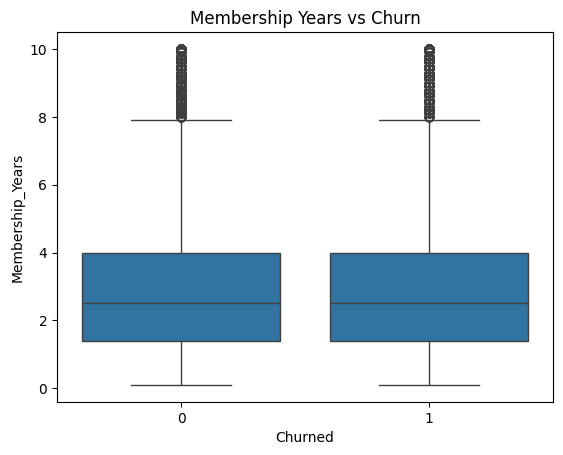

In [ ]:
sns.boxplot(x="Churned", y="Membership_Years", data=df)
plt.title("Membership Years vs Churn")
plt.show()


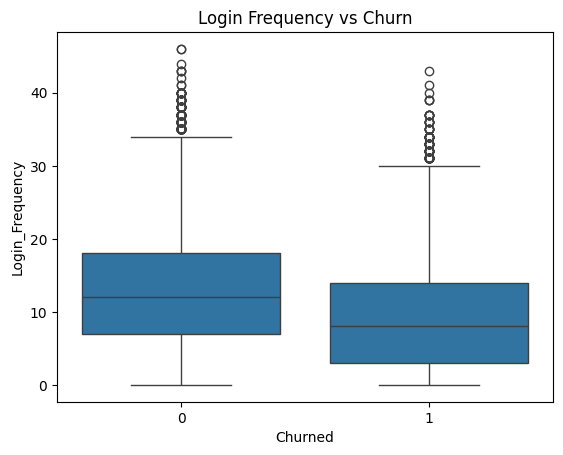

In [ ]:
sns.boxplot(x="Churned", y="Login_Frequency", data=df)
plt.title("Login Frequency vs Churn")
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])



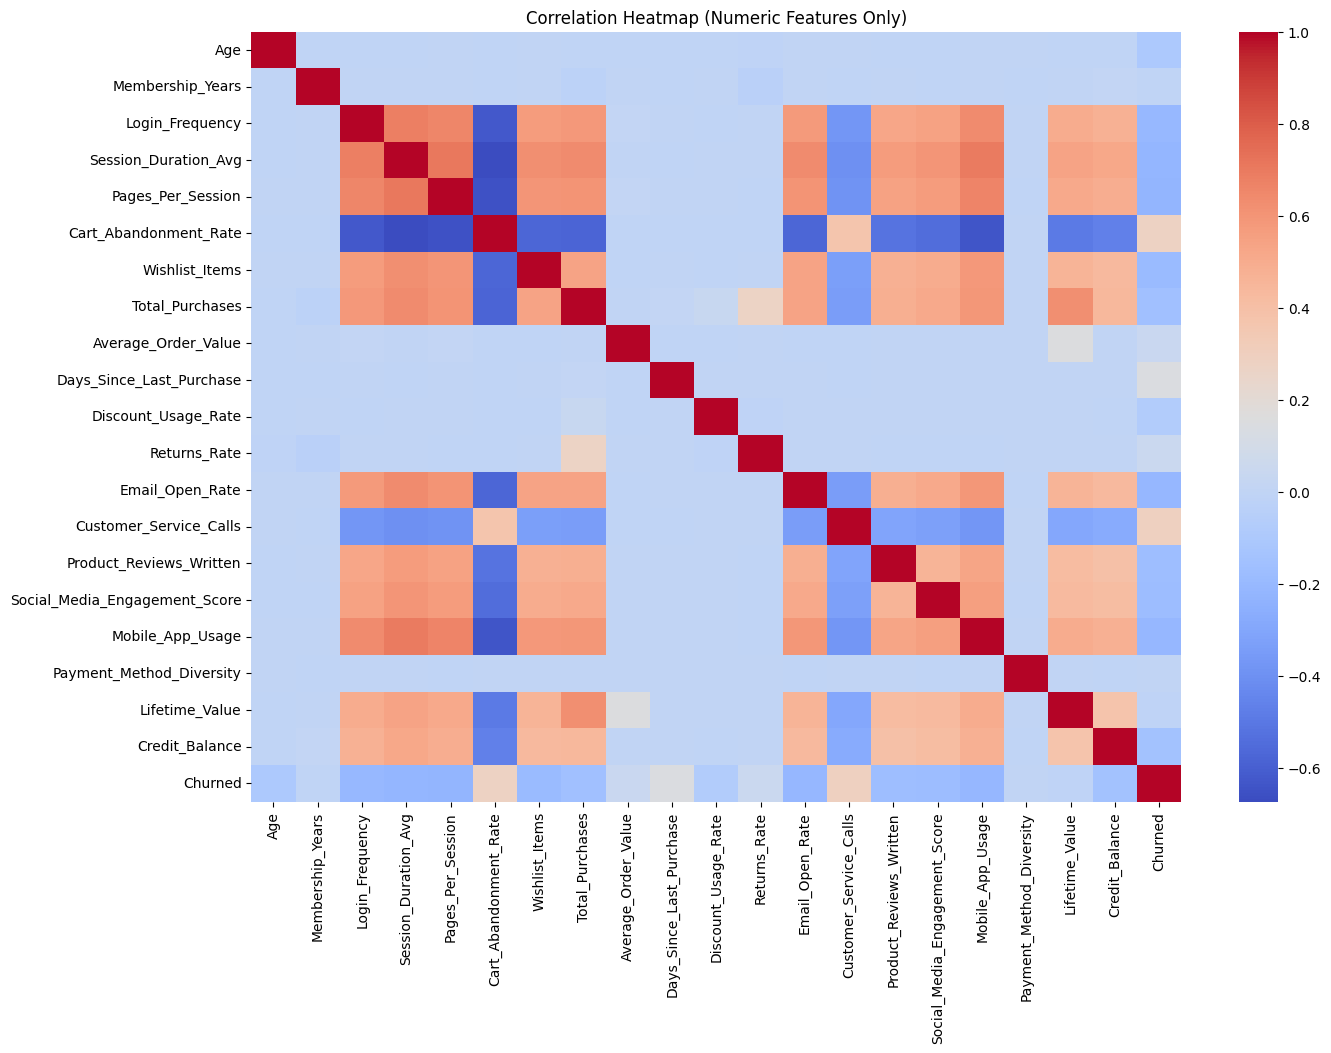

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr_target = numeric_df.corr()["Churned"].sort_values(ascending=False)

print("Top Positive Correlations:\n", corr_target.head(10))
print("\nTop Negative Correlations:\n", corr_target.tail(10))


Top Positive Correlations:
 Churned                     1.000000
Customer_Service_Calls      0.290545
Cart_Abandonment_Rate       0.277963
Days_Since_Last_Purchase    0.148633
Returns_Rate                0.051647
Average_Order_Value         0.042288
Payment_Method_Diversity    0.004412
Membership_Years           -0.000623
Lifetime_Value             -0.010684
Discount_Usage_Rate        -0.074523
Name: Churned, dtype: float64

Top Negative Correlations:
 Credit_Balance                  -0.147935
Total_Purchases                 -0.160029
Product_Reviews_Written         -0.174614
Social_Media_Engagement_Score   -0.179719
Wishlist_Items                  -0.189627
Login_Frequency                 -0.204379
Mobile_App_Usage                -0.211477
Email_Open_Rate                 -0.215104
Session_Duration_Avg            -0.218055
Pages_Per_Session               -0.224880
Name: Churned, dtype: float64



Possible churn indicators:

 Customers with low login frequency churn more

High cart abandonment rate increases churn

More customer service calls = unhappy customers

Higher days since last purchase = churn risk

Low lifetime value users churn more

In [ ]:
# Drop categorical columns (simple regression-friendly approach)
df = df.drop(columns=["Gender", "Country", "City", "Signup_Quarter"])

# Separate features and target
X = df.drop(columns=["Churned"])
y = df["Churned"]


Train-Test Split and Feature Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Multi Layer Perceptron Model

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[6787  343]
 [ 599 2271]]


MLP Evaluation

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)


Training Performance:
Accuracy : 0.91615
Precision: 0.8893411586520258
Recall   : 0.8113126079447323
F1-score : 0.8485368497109826

Test Performance:
Accuracy : 0.9058
Precision: 0.8687834736036726
Recall   : 0.7912891986062718
F1-score : 0.8282275711159738



Logistic Regression Model

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[6589  541]
 [1678 1192]]


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)


Training Performance:
Accuracy : 0.778825
Precision: 0.6945749679624093
Recall   : 0.4212435233160622
F1-score : 0.5244315432994678

Test Performance:
Accuracy : 0.7781
Precision: 0.6878245816503173
Recall   : 0.41533101045296167
F1-score : 0.5179230936345861



Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[6318  812]
 [ 711 2159]]


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)


Training Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

Test Performance:
Accuracy : 0.8477
Precision: 0.726691349713901
Recall   : 0.7522648083623693
F1-score : 0.7392569765451121


Hyperparameter Tuning

logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear']
}

random_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_grid_lr,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_lr.fit(X_train_scaled, y_train)

best_model = random_lr.best_estimator_

y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

best_params_lr = random_lr.best_params_
print("Best Hyperparameters:", best_params_lr)
print("Best CV Accuracy:", random_lr.best_score_)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'fit_intercept': True, 'C': 0.1}
Best CV Accuracy: 0.7784500000000001
Confusion Matrix:
[[6590  540]
 [1682 1188]]


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)


Training Performance:
Accuracy : 0.7788
Precision: 0.6954779622209502
Recall   : 0.41968911917098445
F1-score : 0.5234812580784145

Test Performance:
Accuracy : 0.7778
Precision: 0.6875
Recall   : 0.4139372822299652
F1-score : 0.5167464114832536


Decision Tree

In [ ]:
param_dist_dt = {
    'criterion': ['entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

random_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_dt.fit(X_train_scaled, y_train)

best_model = random_dt.best_estimator_

y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

best_params_dt = random_dt.best_params_
print("Best Hyperparameters:", best_params_dt)
print("Best CV Accuracy:", random_dt.best_score_)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'log_loss'}
Best CV Accuracy: 0.85315
Confusion Matrix:
[[6551  579]
 [ 886 1984]]


Feature Selection

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)


Training Performance:
Accuracy : 0.9235
Precision: 0.9108003857280618
Recall   : 0.8156303972366149
F1-score : 0.8605922551252847

Test Performance:
Accuracy : 0.8535
Precision: 0.7740928599297698
Recall   : 0.6912891986062718
F1-score : 0.7303515553101417


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

n_features_to_select = 6
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)

X_train_top = rfe.fit_transform(X_train, y_train)
X_test_top = rfe.transform(X_test)

feature_ranking = rfe.ranking_
feature_support = rfe.support_

feature_names = X_train.columns[rfe.support_]
print("Selected features:", feature_names)


Selected features: Index(['Age', 'Cart_Abandonment_Rate', 'Discount_Usage_Rate',
       'Email_Open_Rate', 'Customer_Service_Calls', 'Lifetime_Value'],
      dtype='object')


In [ ]:
lr = LogisticRegression(max_iter=300, random_state=42)
lr.fit(X_train_top, y_train)

y_train_pred = lr.predict(X_train_top)
y_test_pred = lr.predict(X_test_top)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[6563  567]
 [1866 1004]]


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)

Training Performance:
Accuracy : 0.7581
Precision: 0.6502525252525253
Recall   : 0.35578583765112265
F1-score : 0.45992409019870506

Test Performance:
Accuracy : 0.7567
Precision: 0.6390833863781031
Recall   : 0.34982578397212544
F1-score : 0.45215041657284394


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_top, y_train)

y_train_pred = dt.predict(X_train_top)
y_test_pred = dt.predict(X_test_top)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[6095 1035]
 [ 914 1956]]


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)


Training Performance:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

Test Performance:
Accuracy : 0.8051
Precision: 0.6539618856569709
Recall   : 0.6815331010452962
F1-score : 0.6674628902917591


In [ ]:
lr = LogisticRegression(**best_params_lr)
lr.fit(X_train_top, y_train)

y_train_pred = lr.predict(X_train_top)
y_test_pred = lr.predict(X_test_top)

lr_train_acc = accuracy_score(y_train, y_train_pred)
lr_train_precision = precision_score(y_train, y_train_pred)
lr_train_recall = recall_score(y_train, y_train_pred)
lr_train_f1 = f1_score(y_train, y_train_pred)

lr_test_acc = accuracy_score(y_test, y_test_pred)
lr_test_precision = precision_score(y_test, y_test_pred)
lr_test_recall = recall_score(y_test, y_test_pred)
lr_test_f1 = f1_score(y_test, y_test_pred)

lr_cv_score = random_lr.best_score_

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[6567  563]
 [1871  999]]


In [ ]:
dt = DecisionTreeClassifier(**best_params_dt)
dt.fit(X_train_top, y_train)

y_train_pred = dt.predict(X_train_top)
y_test_pred = dt.predict(X_test_top)

dt_train_acc = accuracy_score(y_train, y_train_pred)
dt_train_precision = precision_score(y_train, y_train_pred)
dt_train_recall = recall_score(y_train, y_train_pred)
dt_train_f1 = f1_score(y_train, y_train_pred)

dt_test_acc = accuracy_score(y_test, y_test_pred)
dt_test_precision = precision_score(y_test, y_test_pred)
dt_test_recall = recall_score(y_test, y_test_pred)
dt_test_f1 = f1_score(y_test, y_test_pred)

dt_cv_score = random_dt.best_score_

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[6597  533]
 [ 923 1947]]


Model Comparision

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features': [n_features_to_select, n_features_to_select],
    'CV Score': [round(lr_cv_score, 2), round(dt_cv_score, 2)],
    'Accuracy': [round(lr_test_acc, 2), round(dt_test_acc, 2)],
    'Precision': [round(lr_test_precision, 2), round(dt_test_precision, 2)],
    'Recall': [round(lr_test_recall, 2), round(dt_test_recall, 2)],
    'F1-Score': [round(lr_test_f1, 2), round(dt_test_f1, 2)]
})

print(comparison_df)


                 Model  Features  CV Score  Accuracy  Precision  Recall  \
0  Logistic Regression         6      0.78      0.76       0.64    0.35   
1        Decision Tree         6      0.85      0.85       0.79    0.68   

   F1-Score  
0      0.45  
1      0.73  
